In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('./data/DDoS_Attack_Dataset.csv')

In [127]:
df

,Time,Frame Number,Frame_length,Source_ip,Destination_IP,SYN,ACK,RST,TTL,TCP_Protocol,Type,Has_Port,Has_Protocol
0,80.222740,1945582,114,192.168.74.8,31.13.84.15,0,1,0,"63,128",0,2,1,1
1,80.222756,1945583,64,54.231.184.9,192.168.104.13,0,1,0,32,0,2,1,1
2,80.222931,1945584,182,10.50.195.28,185.25.182.226,-1,-1,-1,127,1,2,0,1
3,80.223200,1945585,68,92.45.54.178,10.50.209.134,-1,-1,-1,116,1,2,0,1
4,80.223217,1945586,114,192.168.74.8,31.13.84.15,0,1,0,"63,128",0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382976,69.999327,894387,91,79.123.178.90,74.125.11.166,-1,-1,-1,127,1,0,0,1
5382977,69.999353,894388,126,192.168.76.223,104.244.43.7,0,1,0,"63,64",0,0,1,1
5382978,69.999464,894389,91,79.123.178.90,74.125.11.166,-1,-1,-1,127,1,0,0,1
5382979,69.999583,894390,126,192.168.64.10,46.20.153.2,0,1,0,"63,64",0,0,1,1


In [4]:
df.shape

(5382981, 14)

In [5]:
df.isnull().sum()/df.shape[0]*100

Unnamed: 0           0.000000
Time                 0.000000
Frame Number         0.000000
Frame_length         0.000000
Source_ip            0.000000
Destination_IP       0.000000
Source_Port         45.860816
Destination_Port    45.860816
SYN                 45.861132
ACK                 45.861132
RST                 45.861132
TTL                  0.386552
TCP_Protocol         0.386552
Type                 0.000000
dtype: float64

We have the same number of missing values for features Source_Port and Destination_Port. The same trend is seen in SYN, ACK and RST. 

In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df['Destination_Port'].value_counts(dropna=False)

NaN        2468679
80.0        707480
443.0       615996
445.0        41000
49532.0      33902
            ...   
39700.0          1
60368.0          1
62860.0          1
34644.0          1
64147.0          1
Name: Destination_Port, Length: 22252, dtype: int64

In [8]:
df[['SYN','ACK','RST']].fillna('NaN',inplace=True)

c:\users\ashwin\miniconda3\lib\site-packages\pandas\core\frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [9]:
df.describe()

,Time,Frame Number,Frame_length,Source_Port,Destination_Port
count,5.382981e+06,5.382981e+06,5.382981e+06,2.914302e+06,2.914302e+06
mean,2.589057e+02,4.719064e+06,7.366361e+02,2.588251e+04,2.483453e+04
std,1.551605e+02,3.015342e+06,1.164071e+03,2.634311e+04,2.660856e+04
min,0.000000e+00,1.000000e+00,6.000000e+01,2.100000e+01,2.000000e+00
25%,9.514303e+01,2.090838e+06,7.000000e+01,4.430000e+02,8.000000e+01
50%,2.869026e+02,4.488226e+06,1.380000e+02,9.650000e+03,2.452000e+03
75%,3.980190e+02,7.685786e+06,1.396000e+03,5.195500e+04,5.196600e+04
max,4.826629e+02,9.335605e+06,2.487800e+04,6.553400e+04,6.553400e+04


<AxesSubplot:xlabel='Type', ylabel='Frame Number'>

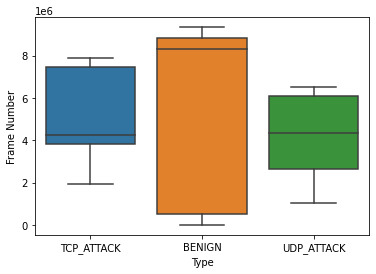

In [10]:
sns.boxplot(x=df['Type'],y=df['Frame Number'])

In [11]:
df['SYN'].factorize()[0].all()==df['ACK'].factorize()[0].all()

True

In [12]:
df.isnull().sum()

Time                      0
Frame Number              0
Frame_length              0
Source_ip                 0
Destination_IP            0
Source_Port         2468679
Destination_Port    2468679
SYN                 2468696
ACK                 2468696
RST                 2468696
TTL                   20808
TCP_Protocol          20808
Type                      0
dtype: int64

In [13]:
df['SYN'].all()==df['RST'].all()

True

In [14]:
df['ACK'].unique()

array(['Set', nan, 'Not set'], dtype=object)

In [15]:
df['ACK'].fillna('NaN',inplace=True)
df['ACK'].replace({'Set':1,'Not set':0,'NaN':-1},inplace=True)

In [16]:
df['Type'].replace({'TCP_ATTACK':2,'UDP_ATTACK':1,'BENIGN':0},inplace=True)
df['SYN']=df['SYN'].factorize()[0]
df['RST']=df['RST'].factorize()[0]

In [17]:
(df['SYN'].all()==df['ACK'].all()) & (df['SYN'].all()==df['RST'].all())

True

Hence, we see that SYN, ACK and RST are all columns which are providing us the same information. It is best to choose only one of the three and proceed. This makes sense with our previous observation that the number of missing values were the same for all the columns.

In [18]:
df['Type'].corr(df['SYN'])

0.08817963449048995

In [19]:
df.corr()

,Time,Frame Number,Frame_length,Source_Port,Destination_Port,SYN,ACK,RST,Type
Time,1.000000,0.982472,0.005519,0.013995,0.016203,0.103933,0.113025,0.111350,-0.066151
Frame Number,0.982472,1.000000,0.012259,0.012584,0.016584,0.134844,0.135870,0.137606,-0.031491
Frame_length,0.005519,0.012259,1.000000,-0.258440,0.291558,0.108666,0.181767,0.156560,-0.018626
Source_Port,0.013995,0.012584,-0.258440,1.000000,-0.828630,-0.026449,-0.010306,0.010636,-0.015181
Destination_Port,0.016203,0.016584,0.291558,-0.828630,1.000000,-0.163014,0.209618,-0.022244,-0.025679
SYN,0.103933,0.134844,0.108666,-0.026449,-0.163014,1.000000,0.882666,0.941284,0.088180
ACK,0.113025,0.135870,0.181767,-0.010306,0.209618,0.882666,1.000000,0.976447,0.010508
RST,0.111350,0.137606,0.156560,0.010636,-0.022244,0.941284,0.976447,1.000000,0.038935
Type,-0.066151,-0.031491,-0.018626,-0.015181,-0.025679,0.088180,0.010508,0.038935,1.000000


As is seen from the correlation, the data is highly non-linear. NNs, Bayesian or Tree based models might be a better fit for our purposes. 

In [20]:
df['TCP_Protocol'].fillna('NaN',inplace=True)

In [21]:
df['TCP_Protocol'].value_counts()

TCP                              2914096
UDP                              2044697
Generic Routing Encapsulation     391808
NaN                                20808
ICMP                                4849
ICMP,UDP                            2291
IGMP                                2193
IPv6                                1877
ICMP,TCP                             181
ICMP,ICMP                            181
Name: TCP_Protocol, dtype: int64

In [22]:
df[df['TCP_Protocol']=="Generic Routing Encapsulation"]

,Time,Frame Number,Frame_length,Source_ip,Destination_IP,Source_Port,Destination_Port,SYN,ACK,RST,TTL,TCP_Protocol,Type
62,80.226764,1945644,510,40:f3:08:52:88:48,Alcatel-_70:9b:c7,NaN,NaN,-1,-1,-1,63,Generic Routing Encapsulation,2
267,80.238629,1945849,106,10.101.31.47,192.168.204.16,NaN,NaN,-1,-1,-1,63,Generic Routing Encapsulation,2
269,80.238682,1945851,106,10.101.31.37,192.168.204.16,NaN,NaN,-1,-1,-1,63,Generic Routing Encapsulation,2
271,80.238692,1945853,106,192.168.204.16,10.101.31.47,NaN,NaN,-1,-1,-1,58,Generic Routing Encapsulation,2
273,80.238760,1945855,106,192.168.204.16,10.101.31.37,NaN,NaN,-1,-1,-1,58,Generic Routing Encapsulation,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382789,69.985604,894200,106,10.101.31.12,192.168.204.16,NaN,NaN,-1,-1,-1,63,Generic Routing Encapsulation,0
5382791,69.985660,894202,106,192.168.204.16,10.101.31.12,NaN,NaN,-1,-1,-1,58,Generic Routing Encapsulation,0
5382796,69.986115,894207,132,00:f4:b9:1b:ef:9c,Alcatel-_70:9b:c7,NaN,NaN,-1,-1,-1,63,Generic Routing Encapsulation,0
5382939,69.997365,894350,144,e8:e7:32:70:9b:c7,IntelCor_cd:a9:f1,NaN,NaN,-1,-1,-1,252,Generic Routing Encapsulation,0


In [23]:
df=df[df['TCP_Protocol']!='IPv6']

In [24]:
replacements={
    'ICMP,UDP':'ICMP',
    'ICMP,TCP':'ICMP',
    'ICMP,ICMP':'ICMP'
}

df['TCP_Protocol'].replace(replacements,inplace=True)

In [25]:
df['Source_Port'].fillna(-1,inplace=True)
df['Destination_Port'].fillna(-1,inplace=True)

In [26]:
df['TTL'].fillna(-1,inplace=True)

In [27]:
df.isnull().sum()

Time                0
Frame Number        0
Frame_length        0
Source_ip           0
Destination_IP      0
Source_Port         0
Destination_Port    0
SYN                 0
ACK                 0
RST                 0
TTL                 0
TCP_Protocol        0
Type                0
dtype: int64

In [28]:
df.corr()

,Time,Frame Number,Frame_length,Source_Port,Destination_Port,SYN,ACK,RST,Type
Time,1.000000,0.982472,0.005476,0.071239,0.070505,0.103895,0.112989,0.111312,-0.066291
Frame Number,0.982472,1.000000,0.012205,0.085075,0.084915,0.134791,0.135814,0.137551,-0.031613
Frame_length,0.005476,0.012205,1.000000,-0.108881,0.313188,0.108504,0.181616,0.156402,-0.018700
Source_Port,0.071239,0.085075,-0.108881,1.000000,-0.287315,0.517549,0.543932,0.551742,0.012327
Destination_Port,0.070505,0.084915,0.313188,-0.287315,1.000000,0.461780,0.556914,0.529273,0.004554
SYN,0.103895,0.134791,0.108504,0.517549,0.461780,1.000000,0.882624,0.941264,0.088064
ACK,0.112989,0.135814,0.181616,0.543932,0.556914,0.882624,1.000000,0.976438,0.010364
RST,0.111312,0.137551,0.156402,0.551742,0.529273,0.941264,0.976438,1.000000,0.038798
Type,-0.066291,-0.031613,-0.018700,0.012327,0.004554,0.088064,0.010364,0.038798,1.000000


c:\users\ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

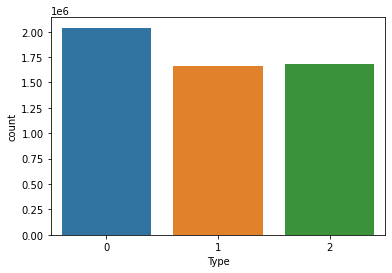

In [29]:
sns.countplot(df['Type'])

In [30]:
df['Has_Port']=df['Source_Port'].apply(lambda x:1 if x>0 else 0)

In [31]:
df.drop(columns=['Source_Port','Destination_Port'],inplace=True)

In [32]:
df['Has_Protocol']=df['TCP_Protocol'].apply(lambda x:1 if x!="NaN" else 0)

In [33]:
df['TCP_Protocol']=df['TCP_Protocol'].factorize()[0]

In [34]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test =train_test_split(df.drop(columns=['Time','Frame Number','Source_ip','Destination_IP','TTL']),df['Type'],test_size=0.3)

In [95]:
X_train

,Frame_length,SYN,ACK,RST,TCP_Protocol,Type,Has_Port,Has_Protocol
3957763,64,-1,-1,-1,1,1,0,1
1027981,64,0,1,0,0,2,1,1
1140719,64,0,1,0,0,2,1,1
2821227,70,0,1,0,0,0,1,1
3296427,66,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...
3281302,1458,0,1,0,0,1,1,1
4973575,71,0,1,0,0,0,1,1
759140,1500,0,1,0,0,2,1,1
5021302,1396,-1,-1,-1,1,0,0,1


In [107]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [108]:
model=tf.keras.Sequential()
model.add(layers.Dense(15,input_shape=(X_train.shape[1],),activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [109]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
es=EarlyStopping()

In [121]:
history=model.fit(X_train,y_train,validation_split=0.3,epochs=10,batch_size=64)

Epoch 1/10
41200/41200 [==============================] - 19s 461us/step - loss: 0.0223 - accuracy: 0.9970 - val_loss: 3.6699e-04 - val_accuracy: 1.0000
Epoch 2/10
41200/41200 [==============================] - 19s 468us/step - loss: 0.0160 - accuracy: 0.9983 - val_loss: 1.8319e-04 - val_accuracy: 1.0000
Epoch 3/10
41200/41200 [==============================] - 20s 477us/step - loss: 0.0115 - accuracy: 0.9989 - val_loss: 1.7082e-04 - val_accuracy: 1.0000
Epoch 4/10
41200/41200 [==============================] - 19s 468us/step - loss: 0.0085 - accuracy: 0.9993 - val_loss: 1.9712e-04 - val_accuracy: 1.0000
Epoch 5/10
41200/41200 [==============================] - 19s 468us/step - loss: 0.0069 - accuracy: 0.9994 - val_loss: 2.4927e-04 - val_accuracy: 1.0000
Epoch 6/10
41200/41200 [==============================] - 19s 469us/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 3.1053e-05 - val_accuracy: 1.0000
Epoch 7/10
41200/41200 [==============================] - 19s 470us/step - loss: 0

In [123]:
history.history

{'loss': [0.022297542542219162,
  0.015964973717927933,
  0.011463274247944355,
  0.008527169935405254,
  0.00694669596850872,
  0.0022810567170381546,
  0.0015597172314301133,
  0.002532297745347023,
  0.002016876358538866,
  0.0021710034925490618],
 'accuracy': [0.9970334768295288,
  0.998268723487854,
  0.9988633394241333,
  0.9993207454681396,
  0.9994170665740967,
  0.9996791481971741,
  0.9998229146003723,
  0.9997884035110474,
  0.9997788667678833,
  0.9997360110282898],
 'val_loss': [0.00036698541953228414,
  0.00018318618822377175,
  0.00017082160047721118,
  0.00019712002540472895,
  0.00024927075719460845,
  3.105296491412446e-05,
  2.7131225579068996e-05,
  5.7180586736649275e-06,
  8.493626955896616e-05,
  4.8347574193030596e-05],
 'val_accuracy': [0.9999991059303284,
  0.9999991059303284,
  0.9999982118606567,
  0.9999991059303284,
  1.0,
  1.0,
  1.0,
  0.9999991059303284,
  1.0,
  0.99998939037323]}

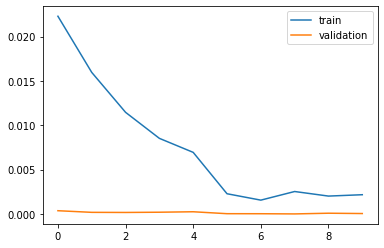

In [124]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])

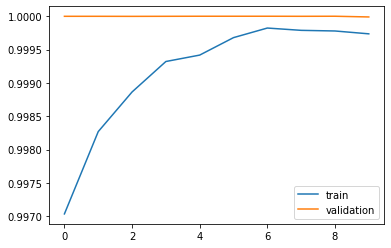

In [126]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])

In [125]:
model.evaluate(X_test,y_test)

50448/50448 [==============================] - 16s 325us/step - loss: 5.3331e-05 - accuracy: 1.0000


[5.333139415597543e-05, 0.9999857544898987]

In [114]:
from sklearn.model_selection import RepeatedKFold,cross_val_score

In [115]:
kfold=RepeatedKFold(n_splits=5,n_repeats=1,random_state=42)

In [116]:
def buildModel():
    model=tf.keras.Sequential()
    model.add(layers.Dense(15,input_shape=(X_train.shape[1],),activation='relu'))
    model.add(layers.Dense(3,activation='softmax'))
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return (model)
    

In [117]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

estimator=KerasClassifier(build_fn=buildModel,validation_split=0.3,epochs=5,batch_size=64)

In [119]:
results=cross_val_score(estimator,X_train,y_train,scoring='accuracy',cv=kfold)

Epoch 1/5
32960/32960 [==============================] - 15s 455us/step - loss: 0.2095 - accuracy: 0.9726 - val_loss: 9.2206e-04 - val_accuracy: 1.0000
Epoch 2/5
32960/32960 [==============================] - 15s 459us/step - loss: 0.0448 - accuracy: 0.9955 - val_loss: 6.3733e-04 - val_accuracy: 0.9999
Epoch 3/5
32960/32960 [==============================] - 15s 455us/step - loss: 0.0273 - accuracy: 0.9976 - val_loss: 0.0016 - val_accuracy: 0.9997
Epoch 4/5
32960/32960 [==============================] - 15s 463us/step - loss: 0.0098 - accuracy: 0.9989 - val_loss: 8.2762e-05 - val_accuracy: 1.0000
Epoch 5/5
32960/32960 [==============================] - 15s 460us/step - loss: 0.0061 - accuracy: 0.9993 - val_loss: 4.3154e-05 - val_accuracy: 1.0000
Epoch 1/5
32960/32960 [==============================] - 16s 464us/step - loss: 0.4529 - accuracy: 0.9558 - val_loss: 0.0860 - val_accuracy: 0.9881
Epoch 2/5
32960/32960 [==============================] - 15s 461us/step - loss: 0.0732 - accurac

In [122]:
results.mean()

0.9999962832881559